In [3]:
import tweepy 
import configparser
import pandas as pd
import os

In [4]:
#read configs
config = configparser.ConfigParser()
config.read('config.ini')

api_key         = config['twitter']['api_key']
api_key_secret  = config['twitter']['api_key_secret']

access_token        = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']

bearer_token        = config['twitter']['bearer_token']

In [5]:
#Authenticate our account with the Twitter API

auth    = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api     = tweepy.API(auth)

# You can authenticate as your app with just your bearer token
client = tweepy.Client(bearer_token=bearer_token)

# If the authentication was successful, this should print the
# screen name / username of the account
print(api.verify_credentials().screen_name)

KLuthra_


In [40]:
words   = '#ad OR #sponsored OR #promoted -is:retweet from:verified lang:en'
tweets  = tweepy.Paginator(client.search_recent_tweets, query = words, 
                                tweet_fields = ['id', 'text', 'author_id', 'attachments', 'context_annotations',
                                                'created_at', 'entities', 'public_metrics'],
                                max_results  = 100).flatten(limit=100)



In [77]:
# function to display data of each tweet
def printtweetdata(n, ith_tweet):
        print()
        print(f"Tweet {n}")
        print(f"Tweet ID:  {ith_tweet[0]}")
        print(f"Tweet Text:{ith_tweet[1]}")
        print(f"Author ID: {ith_tweet[2]}")
        print(f"Created At:{ith_tweet[3]}")
        print(f"Domain ID: {ith_tweet[4]}")   
        print(f"Domain Name:{ith_tweet[5]}")   
        print(f"Domain Desc:{ith_tweet[6]}")   
        print(f"Entity ID:{ith_tweet[7]}")   
        print(f"Entity Name:{ith_tweet[8]}")   
        print(f"Public Metrics:{ith_tweet[9]}")
        print(f"Entities-Hashtags:{ith_tweet[10]}")    

In [99]:
#function to perform data extraction
def scrape(words, numtweet):
    global db
    # Creating Dataframe using pandas
    db = pd.DataFrame(columns= ['Tweet_ID',
                                'Tweet_Text',
                                'Author_ID',
                                'Created_At',
                                'DomainID', 
                                'Domain_Name',
                                'Domain_Desc', 
                                'Entity_ID', 
                                'Entity_Name', 
                                'Public_Metrics',
                                'Hashtags', 
                                ])
          
    # query   = '#ad OR #sponsored -is:retweet from:verified lang:en'
    tweets  = tweepy.Paginator(client.search_recent_tweets, query = words, 
                                tweet_fields = ['id', 'text', 'author_id', 'attachments', 'context_annotations',
                                                'created_at', 'entities', 'public_metrics'],
                                max_results  = 100).flatten(limit=numtweet)


    list_tweets = [tweet for tweet in tweets]

    i = 1

    for tweet in list_tweets:
                tweetid     = tweet.id
                text        = tweet.text
                authorid    = tweet.author_id
                createdTime = tweet.created_at

                domainID    = []
                domainNames = []
                domaindesc  = []
                entityID    = []
                entityNames = []
                for annotation in tweet.context_annotations:
                    domainID.append(annotation['domain']['id'])
                    domainNames.append(annotation['domain']['name'])
                    domaindesc.append(annotation['domain'].get('description', ''))
                    entityID.append(annotation['entity']['id'])
                    entityNames.append(annotation['entity']['name'])
                metrics     = tweet.public_metrics
                if 'hashtags' in tweet.entities:
                    hashtags= tweet["entities"]["hashtags"]
                else:
                    hashtags= []
              

    
    # Here we are appending all the
    # extracted information in the DataFrame
                ith_tweet       = [tweetid,text,authorid,createdTime,domainID,domainNames,domaindesc,
                entityID,entityNames,metrics,hashtags]
                db.loc[len(db)] = ith_tweet

    # Function call to print tweet data on screen
                # printtweetdata(i, ith_tweet)
                i = i+1
    # we will save our database as a CSV file
    return db

In [100]:
 # number of tweets you want to extract in one run
numtweet = 100
df       = scrape("#ad OR #sponsored OR #promoted from: verified", numtweet)
print('Scraping has completed!')

Scraping has completed!


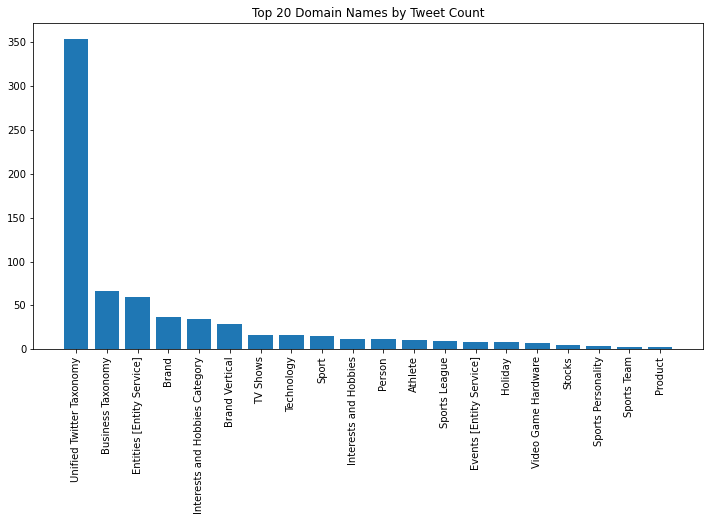

In [105]:
import matplotlib.pyplot as plt

# Extract the domain names from the Domain_Name field
domain_names = [name for row in df['Domain_Name'] for name in row]

# Use the Counter function from the collections module to count the number of tweets for each domain
from collections import Counter
domain_counts = Counter(domain_names)

# Sort the domain names by count in descending order
sorted_domain_counts = sorted(domain_counts.items(), key=lambda item: item[1], reverse=True)

# Get the top 20 domain names and tweet counts
top_20_domains = sorted_domain_counts[:20]
domains = [domain for domain, count in top_20_domains]
tweet_counts = [count for domain, count in top_20_domains]

# Create a figure with a larger size
fig = plt.figure(figsize=(12, 6))

# Create a bar plot of the tweet count for each domain
plt.bar(domains, tweet_counts)

# Add a title to the plot
plt.title('Top 20 Domain Names by Tweet Count')

# Rotate the tick labels to make them easier to read
plt.xticks(rotation=90)

plt.show()

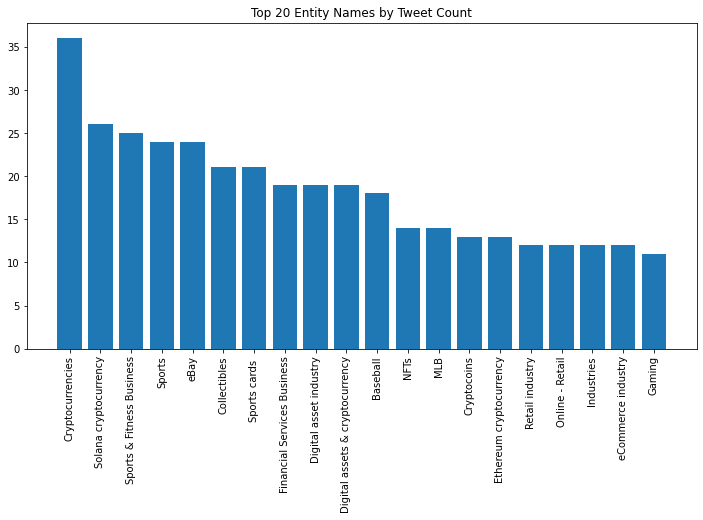

In [106]:
import matplotlib.pyplot as plt

# Extract the entity names from the Entity_Name field
entity_names = [name for row in db['Entity_Name'] for name in row]

# Use the Counter function from the collections module to count the number of tweets for each entity
from collections import Counter
entity_counts = Counter(entity_names)

# Sort the entity names by count in descending order
sorted_entity_counts = sorted(entity_counts.items(), key=lambda item: item[1], reverse=True)

# Get the top 20 entity names and tweet counts
top_20_entities = sorted_entity_counts[:20]
entities = [entity for entity, count in top_20_entities]
tweet_counts = [count for entity, count in top_20_entities]

# Create a figure with a larger size
fig = plt.figure(figsize=(12, 6))

# Create a bar plot of the tweet count for each entity
plt.bar(entities, tweet_counts)

# Add a title to the plot
plt.title('Top 20 Entity Names by Tweet Count')

# Rotate the tick labels to make them easier to read
plt.xticks(rotation=90)

plt.show()